In [1]:
!pwd

/home/ubuntu/Notebook


In [2]:
!ls

diabetic.ipynb


In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import pandas as pd
import numpy as np
# from medpy.io import load
from matplotlib import pyplot as plt
import glob
import cv2

import sklearn.metrics as sklm

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model

import scipy
import matplotlib.image as mpimg
from scipy.misc import imread

%matplotlib inline

Using TensorFlow backend.


In [6]:
rootDir = "/home/ubuntu/Yang_Sahana/train"
ls_file = []
for root, dirs, files in os.walk(rootDir):
    for fileName in files:
        if fileName.endswith('.jpeg'):
            ls_file.append(fileName)

In [ ]:
len(ls_file)

In [ ]:
ls_file[0]

In [ ]:
img1 = mpimg.imread('sample/' + ls_file[0])
img2 = mpimg.imread('sample/' + ls_file[8])

In [ ]:
img1.nbytes / 10**6.

In [ ]:
cv2.resize(img1, (512, 512)).nbytes / 10**6.

In [ ]:
plt.imshow(img1)

In [ ]:
plt.imshow(img2)

In [ ]:
img1.shape

In [ ]:
img2.shape

In [ ]:
width = img1.shape[0]
height = img1.shape[1]

In [ ]:
x = width/2
y = height/2

In [ ]:
plt.imshow(img1[:,500:4000,:])

In [ ]:
def CroppedImagev1(filename, CropRectangle = True):
    img = mpimg.imread(filename)
    height, width, channels = img.shape
    if CropRectangle:
        if width > height:
            delta = width - height
            left = int(delta/2)
            upper = 0
            right = height + left
            lower = height
        else:
            delta = height - width
            left = 0
            upper = int(delta/2)
            right = width
            lower = width + upper
        img = img[upper:lower, left:right]
    plt.imshow(img)
    print "final height, width", img.shape
    return img

In [ ]:
rgb_added = img.sum(axis=2)

In [ ]:
plt.imshow(rgb_added)

In [ ]:
rgb_added.max() / 1000

In [ ]:
plt.hist(rgb_added.sum(axis=0), bins=20)

In [ ]:
img.sum(axis=2).mean()

In [ ]:
img.sum(axis=2).std()

In [ ]:
mean = np.mean(rgb_added.mean(a))

In [ ]:
rgb_added.sum(axis=0)

In [ ]:
np.mean(rgb_added.sum(axis=0))

In [ ]:
std = np.std(rgb_added.sum(axis=0))

In [ ]:
img.shape

In [ ]:
(286-193)*3888

In [ ]:
np.where(rgb_added.sum(axis=0) < (286-193)*3888*.05)

In [ ]:
img = imread('sample/16_left.jpeg')
img_128 = cv2.resize(img, (128,128))
plt.imshow(img)
plt.axvline(340)
plt.axvline(3579)

In [9]:
def crop_borders(img_path, threshold=0.01):
    img = imread(img_path)

    rgb_added = img.sum(axis=2)
    mean_px = rgb_added.mean()
    std_px = rgb_added.std()
    # not using std as it can be very high

    col_sum = rgb_added.sum(axis=0)
    row_sum = rgb_added.sum(axis=1)

    thresh_val = (mean_px)*threshold
    col_index = np.where(col_sum > thresh_val*col_sum.shape[0])
    row_index = np.where(row_sum > thresh_val*row_sum.shape[0])
    hstart, hend = col_index[0][0], col_index[0][-1]
    wstart, wend = row_index[0][0], row_index[0][-1]
    return img[wstart:wend, hstart:hend]

In [ ]:
sample_imgs = filter(lambda x: '.jpeg' in x, os.listdir('sample/'))

In [ ]:
sample_imgs_path = map(lambda x: 'sample/' + x, sample_imgs)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(50, 50))
ax = ax.ravel()
for idx in range(10):
    ax[idx].imshow(imread(sample_imgs_path[idx]))
    ax[idx].set_xticks([])
    ax[idx].set_yticks([])

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(50, 50))
ax = ax.ravel()
for idx in range(10):
    ax[idx].imshow(crop_borders(sample_imgs_path[idx]))
    ax[idx].set_xticks([])
    ax[idx].set_yticks([])

In [ ]:
img = imread('sample/10_left.jpeg')
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.ravel()
ax[0].imshow(img)
ax[0].axvline(0)
ax[1].imshow(crop_borders('sample/10_left.jpeg', 0.05))

In [ ]:
img.shape

In [ ]:
col_sum.shape

In [ ]:
plt.imshow(img[wstart:wend, hstart:hend])

In [ ]:
for item in col_index:
    print item

In [7]:
resize_128_dir = "/home/ubuntu/final_data/train/128"
# Create directory for 128x128 resize
try:
    os.stat(resize_128_dir)
except:
    os.makedirs(resize_128_dir)
    
resize_256_dir = "/home/ubuntu/final_data/train/256"
# Create directory for 256x256 resize
try:
    os.stat(resize_256_dir)
except:
    os.makedirs(resize_256_dir)

resize_512_dir = "/home/ubuntu/final_data/train/512"
# Create directory for 512x512 resize
try:
    os.stat(resize_512_dir)
except:
    os.makedirs(resize_512_dir)

In [ ]:
# Creating .data files

# Check if all the files are jpeg format
# if not, skip it
# else, apply crop border function on it
# when you convert to .data, the .jpeg is till there in the filename
# therefore, replace the .jpeg with ''

for root, dirs, files in os.walk(rootDir):
    for fileName in files:
        if not fileName.endswith('.jpeg'):
            continue
        img = crop_borders(rootDir + '/' + fileName)
        fileName = fileName.replace(".jpeg", "")
        img_256 = cv2.resize(img, (256,256))
        img_256.tofile(resize_256_dir + '/' + fileName + '.data', sep="", format='uint8')


In [ ]:
# Creating .data files

# Check if all the files are jpeg format
# if not, skip it
# else, apply crop border function on it
# when you convert to .data, the .jpeg is till there in the filename
# therefore, replace the .jpeg with ''

for root, dirs, files in os.walk(rootDir):
    for fileName in files:
        if not fileName.endswith('.jpeg'):
            continue
        img = crop_borders(rootDir + '/' + fileName)
        fileName = fileName.replace(".jpeg", "")
        img_512 = cv2.resize(img, (512,512))
        img_512.tofile(resize_512_dir + '/' + fileName + '.data', sep="", format='uint8')

In [ ]:
# Creating .data files

# Check if all the files are jpeg format
# if not, skip it
# else, apply crop border function on it
# when you convert to .data, the .jpeg is till there in the filename
# therefore, replace the .jpeg with ''

for root, dirs, files in os.walk(rootDir):
    for fileName in files:
        if not fileName.endswith('.jpeg'):
            continue
        img = crop_borders(rootDir + '/' + fileName)
        fileName = fileName.replace(".jpeg", "")
        img_128 = cv2.resize(img, (128,128))
        img_128.tofile(resize_128_dir + '/' + fileName + '.data', sep="", format='uint8') # write it out as binary


In [3]:
# read the labels
labels = pd.read_csv('/home/ubuntu/data/trainLabels.csv')
labels.head(10)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


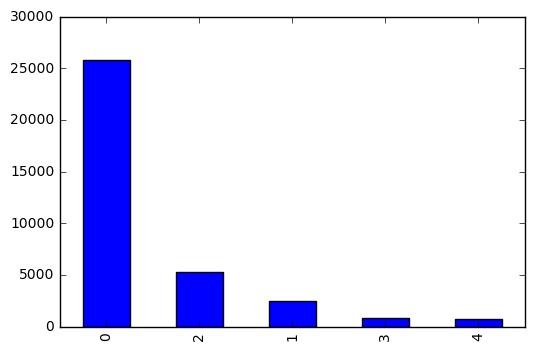

In [14]:
# class imbalance
labels['level'].value_counts().plot(kind='bar')

# Notes:
# 5 labels present - 0 to 4

In [4]:
x_train_list = []
y_train_list = []
x_val_list = []
y_val_list = []

train_percent = 0.6 # 60% train
Image_File_Path = resize_256_dir # Change this for 128 or 512
for index, row in labels.iterrows():
    try:
        img_data = np.fromfile(Image_File_Path + '/' + row['image'] + '.data', dtype='uint8', sep="")
    except:
        continue

    img_data = img_data.reshape([256, 256, 3])
    
    rand_no = np.random.rand()
    if rand_no <= train_percent:
        x_list = x_train_list
        y_list = y_train_list
    else:
        x_list = x_val_list
        y_list = y_val_list
        
    if row['level'] == 0:
        y_list.append([1, 0, 0, 0, 0])
    elif row['level'] == 1:
        y_list.append([0, 1, 0, 0, 0])
    elif row['level'] == 2:
        y_list.append([0, 0, 1, 0, 0])
    elif row['level'] == 3:
        y_list.append([0, 0, 0, 1, 0])
    elif row['level'] == 4:
        y_list.append([0, 0, 0, 0, 1])
    else:
        continue
    
    x_list.append(img_data)

x_train = np.array(x_train_list)
y_train = np.array(y_train_list)
print x_train.shape
print y_train.shape

x_val = np.array(x_val_list)
y_val = np.array(y_val_list)
print x_val.shape
print y_val.shape



(1671, 256, 256, 3)
(1671, 5)
(1122, 256, 256, 3)
(1122, 5)


In [5]:
Use_Model = "VGGNet" # "ResNet" or "VGGNet"

In [6]:
# Function for VGGNet
def VGGNet_model(input_shape, num_classes, use_sgd=False):
    model_vgg19_conv = VGG19(weights='imagenet', include_top=False)
    model_vgg19_conv.summary()
    
#    for layer in model_vgg16_conv.layers:
#        layer.trainable = False

    # Create your own input format
    input = Input(shape=input_shape, name = 'image_input')
    
    # Use the generated model 
    output_vgg19_conv = model_vgg19_conv(input)
  
    
    # Add the fully-connected layers 
    x = Flatten(name='flatten')(output_vgg19_conv)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(1000, activation='relu', name='fc3')(x)

    x = Dense(num_classes, activation='softmax', name='predictions')(x)
    
    # Create model 
    AD_model = Model(input=input, output=x)
    AD_model.summary()

    # Compile model
    if not use_sgd:
        AD_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        print "using adam optimizer"
    else:
        sgd = SGD(lr=0.01, momentum=0.8, decay=0.000001, nesterov=False)
        AD_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=[ 'accuracy' ])
        print "using SGD optimizer"
    
    return AD_model

In [7]:
# Function for resnet
def ResNet_model(input_shape, num_classes):
    model_resnet_conv = ResNet50(weights='imagenet', include_top=False)
    
#    for layer in model_vgg16_conv.layers:
#        layer.trainable = False

    # Create your own input format
    input = Input(shape=input_shape, name = 'image_input')
    
    # Use the generated model 
    output_resnet_conv = model_resnet_conv(input)
    
    # Add the fully-connected layers 
    x = Flatten(name='flatten')(output_resnet_conv)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)

    x = Dense(num_classes, activation='softmax', name='predictions')(x)
    
    # Create model 
    AD_model = Model(input=input, output=x)
    AD_model.summary()

    # Compile model
    AD_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return AD_model

In [8]:
if Use_Model == "ResNet":
    print "Using ResNet"
    my_model = ResNet_model((256,256,3), 5, use_sgd=True)
else:
    print "Using VGGNet"
    my_model= VGGNet_model((256,256,3), 5, use_sgd=True)
my_model.summary()

Using VGGNet
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0       

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("im...)`


In [ ]:
# Fit the model
my_model.fit(x_train, y_train, epochs=1, batch_size=50, validation_data=(x_val, y_val), verbose=1)

Train on 1671 samples, validate on 1122 samples
Epoch 1/1
 250/1671 [===>..........................] - ETA: 3152s - loss: 3.6671 - acc: 0.7536

In [ ]:
# Final evaluation of the model
#scores = my_model.evaluate(x_test, y_test, verbose=0)
#print("CNN Error: %.2f%%" % (100-scores[1]*100))